# Predicting Car Prices

predict a car's market price using its attribute

In [22]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
cars=pd.read_csv('imports-85.data')

In [3]:
cars

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


Seems that last columns from engine location fo noy have column names. They need to be set manually


In [4]:
cars.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


Numeric fields

normalized-losses: continuous from 65 to 256
wheel-base: continuous from 86.6 120.9.
length: continuous from 141.1 to 208.1.
width: continuous from 60.3 to 72.3.
height: continuous from 47.8 to 59.8.
curb-weight: continuous from 1488 to 4066
engine-size: continuous from 61 to 326
bore: continuous from 2.54 to 3.94.
stroke: continuous from 2.07 to 4.17.
compression-ratio: continuous from 7 to 23.
horsepower: continuous from 48 to 288.
peak-rpm: continuous from 4150 to 6600.
city-mpg: continuous from 13 to 49.
highway-mpg: continuous from 16 to 54.
price: continuous from 5118 to 45400.

Drop non numeric and alos normalized-losses -column

In [6]:
cars.drop(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'engine-type', 
        'num-of-cylinders', 'fuel-system'],axis=1, inplace=True)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
wheel-base          204 non-null float64
length              204 non-null float64
width               204 non-null float64
height              204 non-null float64
curb-weight         204 non-null int64
engine-size         204 non-null int64
bore                204 non-null object
stroke              204 non-null object
compression-rate    204 non-null float64
horsepower          204 non-null object
peak-rpm            204 non-null object
city-mpg            204 non-null int64
highway-mpg         204 non-null int64
price               204 non-null object
dtypes: float64(5), int64(4), object(5)
memory usage: 22.4+ KB


In [8]:
cars.drop(cars.loc[cars['price']=='?'].index, inplace=True)
cars.drop(cars.loc[cars['horsepower']=='?'].index, inplace=True)
cars.drop(cars.loc[cars['stroke']=='?'].index, inplace=True)
cars.drop(cars.loc[cars['peak-rpm']=='?'].index, inplace=True)

cars=cars.apply(pd.to_numeric)

In [9]:
cars=cars.dropna()

In [10]:
cars= cars.dropna(axis=0)

To prevent any single column from having too much of an impact, we normalize all of the columns to have a mean of 0 and a standard deviation of 1.

In [11]:
normalized=(cars-cars.mean())/cars.std()
normalized['price'] = cars['price']

In [12]:
normalized

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-1.695849,-0.438716,-0.841268,-2.142111,-0.021017,0.049883,0.518908,-1.836000,-0.294995,0.204618,-0.213025,-0.685926,-0.564335,16500
1,-0.729085,-0.246754,-0.185258,-0.626356,0.501724,0.579482,-2.381450,0.694216,-0.294995,1.337282,-0.213025,-0.997930,-0.710504,16500
2,0.139364,0.185158,0.142748,0.173626,-0.422103,-0.455644,-0.509067,0.470020,-0.049398,-0.032451,0.852101,-0.217920,-0.125826,13950
3,0.073821,0.185158,0.236463,0.173626,0.503625,0.194319,-0.509067,0.470020,-0.540593,0.309982,0.852101,-1.153932,-1.295183,17450
4,0.139364,0.241147,0.189605,-0.331626,-0.098953,0.194319,-0.509067,0.470020,-0.417794,0.178277,0.852101,-0.997930,-0.856674,15250
5,1.122514,1.472899,2.579358,0.763086,0.541642,0.194319,-0.509067,0.470020,-0.417794,0.178277,0.852101,-0.997930,-0.856674,17710
6,1.122514,1.472899,2.579358,0.763086,0.750739,0.194319,-0.509067,0.470020,-0.417794,0.178277,0.852101,-0.997930,-0.856674,18920
7,1.122514,1.472899,2.579358,0.847295,1.001655,0.073955,-0.729348,0.470020,-0.466913,0.968507,0.852101,-1.309934,-1.587522,23875
9,0.368766,0.201155,-0.513263,0.173626,-0.311852,-0.479717,0.629048,-1.451663,-0.344115,-0.058792,1.491176,-0.373922,-0.271996,16430
10,0.368766,0.201155,-0.513263,0.173626,-0.311852,-0.479717,0.629048,-1.451663,-0.344115,-0.058792,1.491176,-0.373922,-0.271996,16925


In [13]:
def knn_train_test_1(train, target, df):
    model = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    indexed = np.random.permutation(df.index)
    randomized = df.reindex(indexed)
    
    train_len = int(0.5 * len(df))

    train_df = randomized.iloc[0:train_len]
    test_df = randomized.iloc[train_len:]
    
    model.fit(train_df[[train]], train_df[target])
    prediction = model.predict(test_df[[train]])

    mse = mean_squared_error(test_df[target], prediction)
    rmse = np.sqrt(mse)
    return(rmse)
    

In [14]:
cols = normalized.columns.drop('price')
for i in cols:
    val=knn_train_test_1(i,'price', normalized)
    print(i, " ", val)

wheel-base   5389.738956209519
length   4931.523050282126
width   3513.3155234066735
height   7656.912800538579
curb-weight   3886.381323194927
engine-size   3532.164764577625
bore   7087.443447757071
stroke   8455.770349464714
compression-rate   6873.702499493733
horsepower   4306.008569094284
peak-rpm   7290.498653147561
city-mpg   3745.8728862025773
highway-mpg   3879.65115309234


In [15]:
def knn_train_test_2(k, train, target, df):
    
    rmse = []
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    indexed = np.random.permutation(df.index)
    randomized = df.reindex(indexed)
    
    train_len = int(0.5 * len(df))

    train_df = randomized.iloc[0:train_len]
    test_df = randomized.iloc[train_len:]
    
    for i in k:
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(train_df[[train]], train_df[target])
        prediction = model.predict(test_df[[train]])

        mse = mean_squared_error(test_df[target], prediction)
        rmse.append(np.sqrt(mse))
        
    
    return(rmse)

In [16]:
cols = normalized.columns.drop('price')
for i in cols:
    val=knn_train_test_2([1,2,3,4,5,6,7],i,'price',normalized)
    print(i, " ", val)

wheel-base   [5727.277872143299, 6553.226629117699, 6507.111822133556, 5536.892388181205, 5389.738956209519, 5486.116715202961, 5511.086579272868]
length   [5100.14314029973, 4731.19641889065, 4741.982620241857, 4567.033866697493, 4931.523050282126, 5088.416817739466, 5189.816080589672]
width   [4693.962532629756, 4256.974417740723, 4378.188846040359, 3803.389008892453, 3513.3155234066735, 3598.0775535456087, 3846.324288307297]
height   [8661.63985866632, 7528.509563138513, 7615.280341701369, 7527.802018433875, 7656.912800538579, 7523.638395914951, 7497.49035861113]
curb-weight   [5339.684766169428, 4305.166902903495, 4244.439496062917, 3700.7698058549704, 3886.381323194927, 3598.4053571752497, 3658.2124643686902]
engine-size   [3363.939622452394, 2985.780823120033, 3311.2047312195, 3420.9622971701683, 3532.164764577625, 3608.9829472069055, 3661.304319847387]
bore   [6328.7265742443315, 6671.717728475449, 6055.867576794814, 6179.391042535839, 7087.443447757071, 6846.04465712196, 6792.5

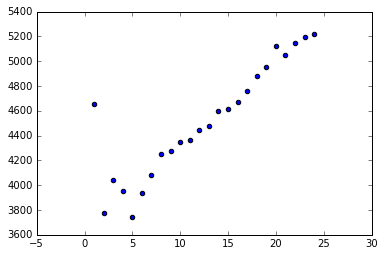

In [27]:
hyper_params = [x for x in range(1, 25)]
val=knn_train_test_2(hyper_params,'city-mpg','price',normalized)
    
plt.scatter(hyper_params, val)
plt.show()

Engine size city mpg were good. K-value varies and around 5 it is quite good